# Solving Various ODEs

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')
if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import sympy as sym
from sympy import symbols, Eq, Function, dsolve
from sympy import exp, plot, sin, cos, printing, init_printing, simplify
t = sym.symbols('t')
y = sym.symbols('y', cls=sym.Function)(t)

Running Python: 3.8.19
Running Sympy: 1.12.1


In [2]:
def Solve_ODE(A = [1,1,1], w = 0, Y0 = [0,0]):
    g0 = sym.symbols('g', cls=sym.Function)
    if len(A) == 3:
        g0 = A[0]*y.diff(t,t) + A[1]*y.diff(t) + A[2]*y - w 
        sol_0 = sym.dsolve(g0, ics={y.subs(t,0): Y0[0], sym.diff(y, t).subs(t,0): Y0[1]})        
    else:
        g0 = A[0]*y.diff(t) + A[1]*y - w 
        sol_0 = sym.dsolve(g0, ics={y.subs(t,0): Y0[0]})
    fun_0 = sym.lambdify([t],sol_0.rhs) 
    return fun_0

we = 3*exp(-3*t)
wc = 3*cos(3*t)

## First Order

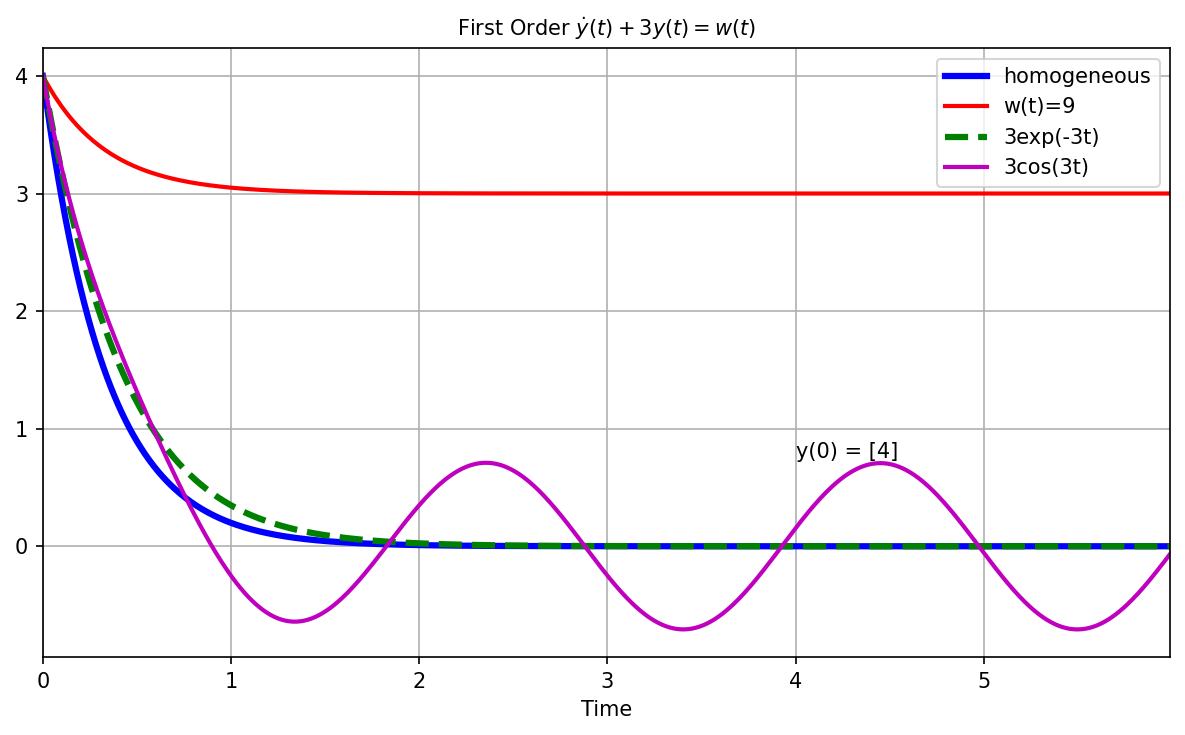

In [3]:
Y0 = [4]
A = [1, 3]
fun_0 = Solve_ODE(A=A,w=0,Y0=Y0)
fun_1 = Solve_ODE(A=A,w=9,Y0=Y0)
fun_2 = Solve_ODE(A=A,w=we,Y0=Y0)
fun_3 = Solve_ODE(A=A,w=wc,Y0=Y0)

tt = np.arange(0, 6, 0.01)
fig = plt.figure(1,figsize=(8,5))
ax = fig.add_subplot()
ax.plot(tt,fun_0(tt),'b-',label='homogeneous',lw=3)
ax.plot(tt,fun_1(tt),'r-',label='w(t)=9')
ax.plot(tt,fun_2(tt),'g--',label='3exp(-3t)',lw=3)
ax.plot(tt,fun_3(tt),'m',label='3cos(3t)')
ax.set_xlabel('Time')
ax.text(4,.75,'y(0) = '+str(Y0))
plt.legend()
plt.title('First Order $\dot y(t) + 3y(t) = w(t)$')
savefig('figs/first_order.png', dpi=300)
plt.show()

## Second Order 

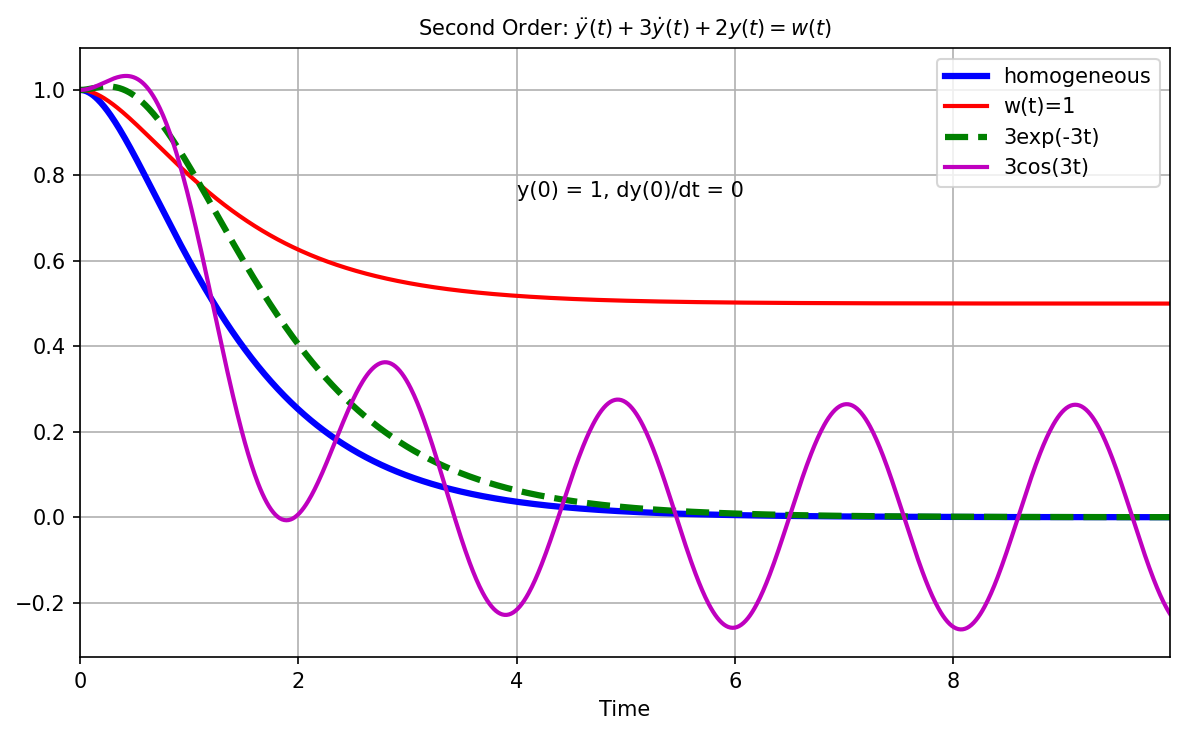

In [4]:
Y0 = [1, 0]
A = [1, 3, 2]
fun_0 = Solve_ODE(A=A,w=0,Y0=Y0)
fun_1 = Solve_ODE(A=A,w=1,Y0=Y0)
fun_2 = Solve_ODE(A=A,w=we,Y0=Y0)
fun_3 = Solve_ODE(A=A,w=wc,Y0=Y0)

tt = np.arange(0, 10, 0.01)
fig = plt.figure(1,figsize=(8,5))
ax = fig.add_subplot()
ax.plot(tt,fun_0(tt),'b-',label='homogeneous',lw=3)
ax.plot(tt,fun_1(tt),'r-',label='w(t)=1')
ax.plot(tt,fun_2(tt),'g--',label='3exp(-3t)',lw=3)
ax.plot(tt,fun_3(tt),'m',label='3cos(3t)')
ax.text(4,.75,'y(0) = '+str(Y0[0])+', dy(0)/dt = '+str(Y0[1]))
ax.set_xlabel('Time')
plt.legend()
plt.title('Second Order: $\ddot y(t) + 3\dot y(t) + 2y(t) = w(t)$')
savefig('figs/second_order.png', dpi=300)
plt.show()

## Second Order - Complex

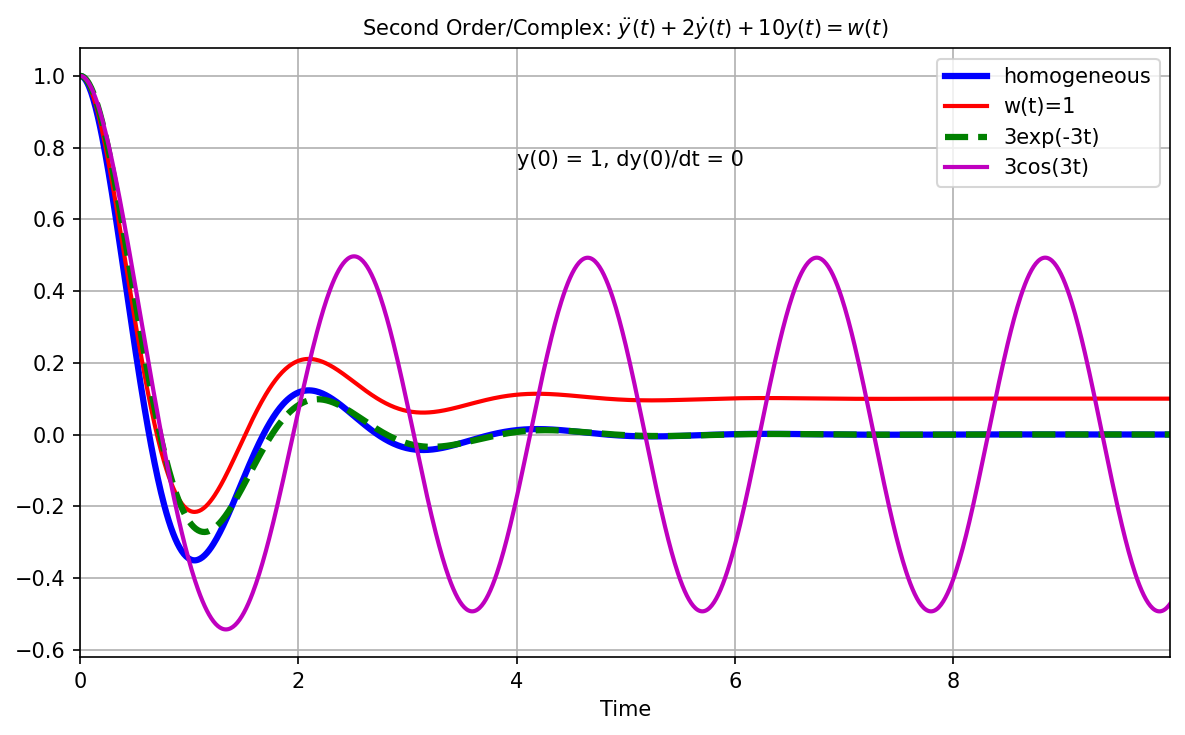

In [5]:
Y0 = [1, 0]
A = [1, 2, 10]
fun_0 = Solve_ODE(A=A,w=0,Y0=Y0)
fun_1 = Solve_ODE(A=A,w=1,Y0=Y0)
fun_2 = Solve_ODE(A=A,w=we,Y0=Y0)
fun_3 = Solve_ODE(A=A,w=wc,Y0=Y0)

tt = np.arange(0, 10, 0.01)
fig = plt.figure(1,figsize=(8,5))
ax = fig.add_subplot()
ax.plot(tt,fun_0(tt),'b-',label='homogeneous',lw=3)
ax.plot(tt,fun_1(tt),'r-',label='w(t)=1')
ax.plot(tt,fun_2(tt),'g--',label='3exp(-3t)',lw=3)
ax.plot(tt,fun_3(tt),'m',label='3cos(3t)')
ax.text(4,.75,'y(0) = '+str(Y0[0])+', dy(0)/dt = '+str(Y0[1]))
ax.set_xlabel('Time')
plt.legend()
plt.title('Second Order/Complex: $\ddot y(t) + 2\dot y(t) + 10y(t) = w(t)$')
savefig('figs/second_order_complex.png', dpi=300)
plt.show()

## Second Order -- Complex Poles

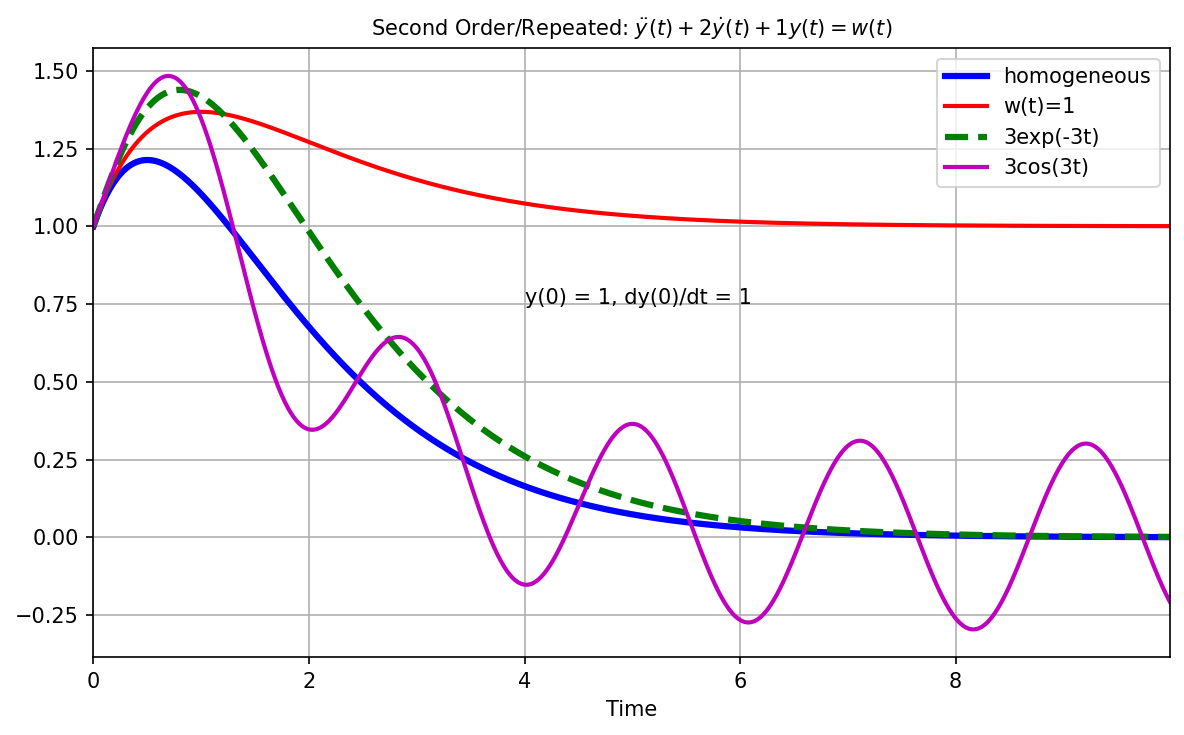

In [6]:
Y0 = [1, 1]
A = [1, 2, 1]
fun_0 = Solve_ODE(A=A,w=0,Y0=Y0)
fun_1 = Solve_ODE(A=A,w=1,Y0=Y0)
fun_2 = Solve_ODE(A=A,w=we,Y0=Y0)
fun_3 = Solve_ODE(A=A,w=wc,Y0=Y0)

tt = np.arange(0, 10, 0.01)
fig = plt.figure(1,figsize=(8,5))
ax = fig.add_subplot()
ax.plot(tt,fun_0(tt),'b-',label='homogeneous',lw=3)
ax.plot(tt,fun_1(tt),'r-',label='w(t)=1')
ax.plot(tt,fun_2(tt),'g--',label='3exp(-3t)',lw=3)
ax.plot(tt,fun_3(tt),'m',label='3cos(3t)')
ax.text(4,.75,'y(0) = '+str(Y0[0])+', dy(0)/dt = '+str(Y0[1]))
ax.set_xlabel('Time')
plt.legend()
plt.title('Second Order/Repeated: $\ddot y(t) + 2\dot y(t) + 1y(t) = w(t)$')
savefig('figs/second_order_repeated.png', dpi=300)
plt.show()

## Advanced Inputs

In [7]:
# Impulse response
g0 = y.diff(t,t) + 2*y.diff(t) + 10*y - sym.DiracDelta(t)
sym.dsolve(g0, ics={y.subs(t,0): 0, sym.diff(y, t).subs(t,0): 0})

Eq(y(t), (Heaviside(t)/3 - 1/6)*exp(-t)*sin(3*t))

In [8]:
# Step response
g1 = y.diff(t,t) + 2*y.diff(t) + 10*y - sym.Heaviside(t)
sym.dsolve(g1, ics={y.subs(t,0): 0, sym.diff(y, t).subs(t,0): 0})

Eq(y(t), (-sin(3*t)*Heaviside(t)/30 - cos(3*t)*Heaviside(t)/10)*exp(-t) + Heaviside(t)/10)

# Solve Numerically

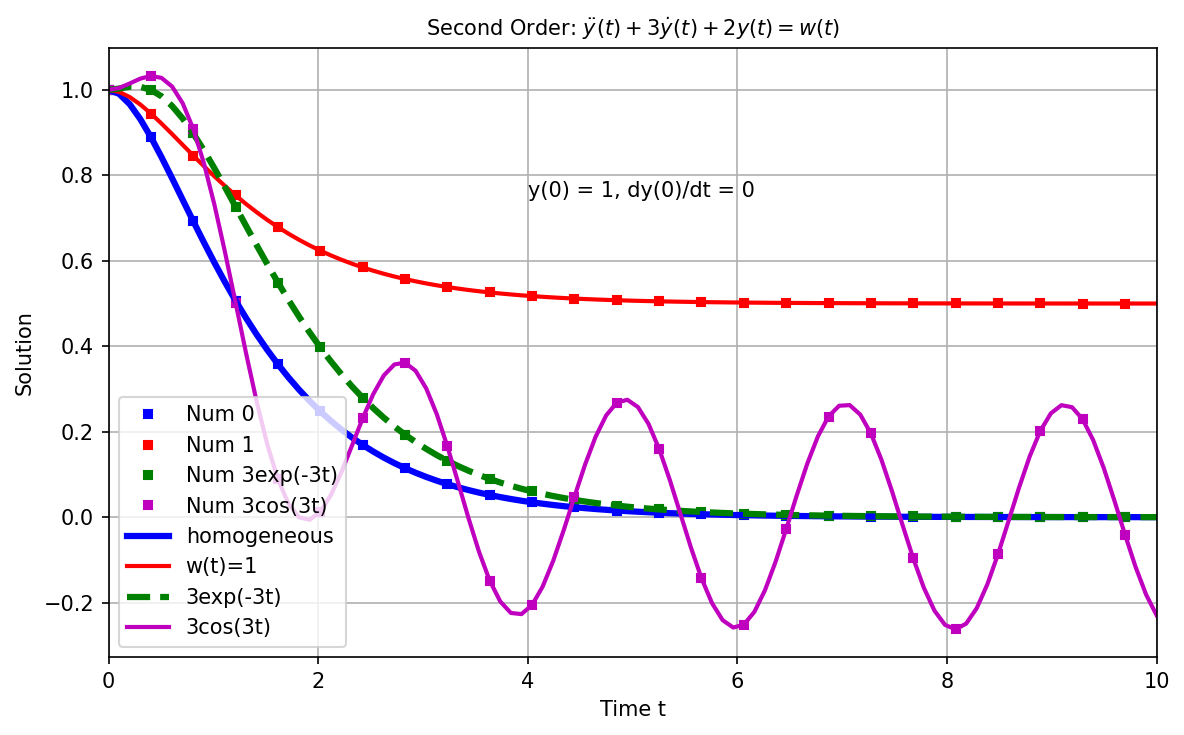

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Y0 = [1, 0] # Initial conditions
A = [1, 3, 2] #ODE coeffs 
W0 = lambda t: 0
W1 = lambda t: 1
Wc = lambda t: 3*cos(3*t)
We = lambda t: 3*exp(-3*t)

def odes(t, Y, W): # Define the system of first-order ODEs
    y, v = Y
    dvdt = W(t) - A[1]/A[0] * v - A[2]/A[0]*y
    return [v, dvdt]

t_span = [0, 10] # Time span
t_eval = np.linspace(t_span[0], t_span[1], 100) # Time points where the solution is computed

# Solve the ODE
solution_0 = solve_ivp(odes, t_span, Y0, t_eval=t_eval, args={W0})
solution_1 = solve_ivp(odes, t_span, Y0, t_eval=t_eval, args={W1})
solution_e = solve_ivp(odes, t_span, Y0, t_eval=t_eval, args={We})
solution_c = solve_ivp(odes, t_span, Y0, t_eval=t_eval, args={Wc})

fun_0 = Solve_ODE(A=A,w=0,Y0=Y0)
fun_1 = Solve_ODE(A=A,w=1,Y0=Y0)
fun_2 = Solve_ODE(A=A,w=we,Y0=Y0)
fun_3 = Solve_ODE(A=A,w=wc,Y0=Y0)

fig = plt.figure(figsize=(8, 5)) # Plot the results
ax = fig.add_subplot()
ax.plot(solution_0.t, solution_0.y[0], 'bs', label='Num 0', ms=4, markevery=4)
ax.plot(solution_1.t, solution_1.y[0], 'rs', label='Num 1', ms=4, markevery=4)
ax.plot(solution_e.t, solution_e.y[0], 'gs', label='Num 3exp(-3t)', ms=4, markevery=4)
ax.plot(solution_c.t, solution_c.y[0], 'ms', label='Num 3cos(3t)', ms=4, markevery=4)
ax.plot(t_eval,fun_0(t_eval),'b-',label='homogeneous',lw=3)
ax.plot(t_eval,fun_1(t_eval),'r-',label='w(t)=1')
ax.plot(t_eval,fun_2(t_eval),'g--',label='3exp(-3t)',lw=3)
ax.plot(t_eval,fun_3(t_eval),'m',label='3cos(3t)')
ax.text(4,.75,'y(0) = '+str(Y0[0])+', dy(0)/dt = '+str(Y0[1]))
ax.set_xlabel('Time t')
ax.set_ylabel('Solution')
ax.set_title('Solution of the Second-Order ODE')
ax.grid(True)

ax.legend()
plt.title('Second Order: $\ddot y(t) + 3\dot y(t) + 2y(t) = w(t)$')
savefig('figs/second_order_2.png', dpi=300)
plt.show()